<a href="https://colab.research.google.com/github/Ishvini29/Loan_Prediction_ML/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
from sklearn import svm

In [ ]:
import csv

In [ ]:
!pip install pandas


In [ ]:
import pandas as pd


In [ ]:
file_path = "loan.csv"
df = pd.read_csv(file_path)
print(df.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


<Axes: >

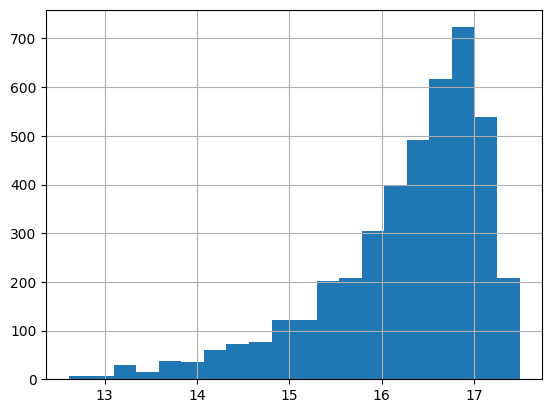

In [ ]:
df['loanAmount_log']=np.log(df[' loan_amount'])
df['loanAmount_log'].hist(bins=20)

In [ ]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


<Axes: >

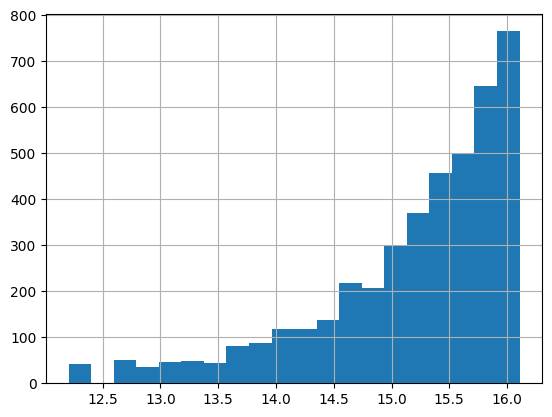

In [ ]:
df['TotalIncome_log']=np.log(df[' income_annum'])
df['TotalIncome_log'].hist(bins=20)

In [ ]:
df[' education'].fillna(df[' education'].mode()[0],inplace=True)
df[' no_of_dependents'].fillna(df[' no_of_dependents'].mode()[0],inplace=True)
df[' self_employed'].fillna(df[' self_employed'].mode()[0],inplace=True)

# df. loan_amount=df. loan_amount.fillna(df. loan_amount.mean())
df.loanAmount_log=df.loanAmount_log.fillna(df.loanAmount_log.mean())

df[' loan_term'].fillna(df[' loan_term'].mode()[0],inplace=True)

df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

x

array([[2, ' Graduate', ' No', ..., 22700000, 17.213369038360916,
        16.077273656438063],
       [0, ' Not Graduate', ' Yes', ..., 8800000, 16.316946509703484,
        15.226497531674536],
       [3, ' Graduate', ' No', ..., 33300000, 17.20665760377293,
        16.02378497148708],
       ...,
       [2, ' Not Graduate', ' No', ..., 18100000, 16.98938901690174,
        15.687312734865866],
       [1, ' Not Graduate', ' No', ..., 14100000, 16.364955728889846,
        15.226497531674536],
       [1, ' Graduate', ' No', ..., 35700000, 17.20665760377293,
        16.034714042019267]], dtype=object)

In [ ]:
y

array([' Approved', ' Rejected', ' Rejected', ..., ' Rejected',
       ' Approved', ' Approved'], dtype=object)

number of people who take loan as grouped by education:
 education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64


<ipython-input-51-ee3022c09924>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' education',data=df,palette='Set1')


<Axes: xlabel=' education', ylabel='count'>

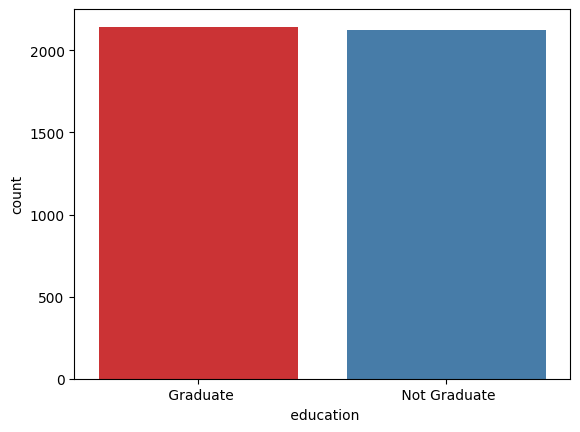

In [ ]:
import seaborn as sns
print("number of people who take loan as grouped by education:")
print(df[' education'].value_counts())
sns.countplot(x=' education',data=df,palette='Set1')

number of people who take loan as grouped by self_employed:
 self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64


<ipython-input-58-2ec8f934d4c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' self_employed',data=df,palette='Set1')


<Axes: xlabel=' self_employed', ylabel='count'>

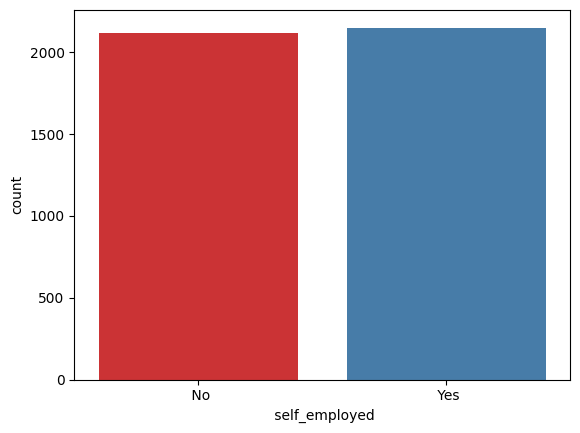

In [ ]:
print("number of people who take loan as grouped by self_employed:")
print(df[' self_employed'].value_counts())
sns.countplot(x=' self_employed',data=df,palette='Set1')

number of people who take loan as grouped by no_of_dependentsd:
 no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64


<ipython-input-59-3b815701a98a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' no_of_dependents',data=df,palette='Set1')


<Axes: xlabel=' no_of_dependents', ylabel='count'>

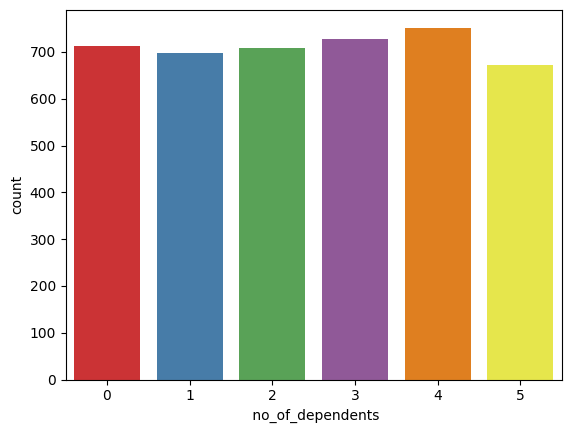

In [ ]:
print("number of people who take loan as grouped by no_of_dependentsd:")
print(df[' no_of_dependents'].value_counts())
sns.countplot(x=' no_of_dependents',data=df,palette='Set1')

number of people who take loan as grouped by loan_amount:
 loan_amount
10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name: count, Length: 378, dtype: int64


<ipython-input-60-1f854f47fc91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' loan_amount',data=df,palette='Set1')


<Axes: xlabel=' loan_amount', ylabel='count'>

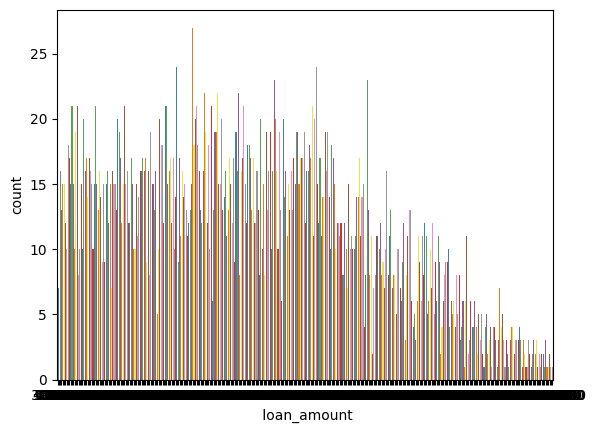

In [ ]:
print("number of people who take loan as grouped by loan_amount:")
print(df[' loan_amount'].value_counts())
sns.countplot(x=' loan_amount',data=df,palette='Set1')

number of people who take loan as grouped by loan_term:
 loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64


<ipython-input-61-9bebecdb9438>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' loan_term',data=df,palette='Set1')


<Axes: xlabel=' loan_term', ylabel='count'>

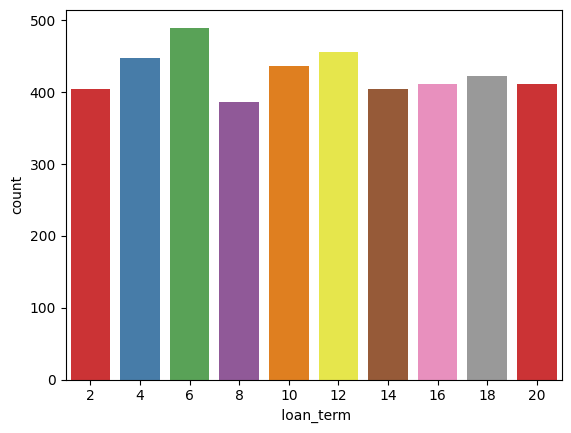

In [ ]:
print("number of people who take loan as grouped by loan_term:")
print(df[' loan_term'].value_counts())
sns.countplot(x=' loan_term',data=df,palette='Set1')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x=LabelEncoder()

In [ ]:
for i in range(0,5):
  X_train[:,i]=LabelEncoder_x.fit_transform(X_train[:,i])
  X_train[:,7]=LabelEncoder_x.fit_transform(X_train[:,7])

X_train

array([[2, 0, 1, ..., 9200000, 15.671808548329901, 25],
       [1, 1, 1, ..., 25900000, 17.246266741867974, 82],
       [2, 1, 0, ..., 23800000, 17.445170652418238, 95],
       ...,
       [3, 1, 1, ..., 25300000, 16.972510979114386, 62],
       [4, 1, 0, ..., 21000000, 16.349207371921707, 52],
       [1, 1, 1, ..., 16000000, 16.636889444373487, 48]], dtype=object)

In [ ]:
LabelEncoder_y=LabelEncoder()
y_train=LabelEncoder_y.fit_transform(y_train)

y_train

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
for i in range(0,5):
  X_test[:,i]=LabelEncoder_x.fit_transform(X_test[:,i])
  X_test[:,7]=LabelEncoder_x.fit_transform(X_test[:,7])

X_test

array([[1, 0, 1, ..., 28700000, 16.689075197544057, 81],
       [2, 0, 1, ..., 17800000, 16.98938901690174, 70],
       [1, 0, 0, ..., 18700000, 16.575520497997196, 77],
       ...,
       [0, 0, 1, ..., 25400000, 16.636889444373487, 73],
       [2, 1, 0, ..., 10800000, 16.46875252257149, 42],
       [0, 0, 1, ..., 17100000, 16.654589021472887, 53]], dtype=object)

In [ ]:
LabelEncoder_y=LabelEncoder()
y_test=LabelEncoder_y.fit_transform(y_test)

y_test

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics
y_pred=rf_clf.predict(X_test)
print("acc of random forest clf is",metrics.accuracy_score(y_pred,y_test))

y_pred

acc of random forest clf is 0.5831381733021077


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=nb_clf.predict(X_test)
print("acc of gaussianNB is %.",metrics.accuracy_score(y_pred,y_test))

acc of gaussianNB is %. 0.6124121779859485


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt_clf.predict(X_test)
print("acc of DT is",metrics.accuracy_score(y_pred,y_test))

acc of DT is 0.5456674473067916


In [ ]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=kn_clf.predict(X_test)
print("acc of KN is",metrics.accuracy_score(y_pred,y_test))

acc of KN is 0.5737704918032787


**GaussianNB** - acccuracy of 61%